# week4 授業課題　信用情報の学習

# 【問題1】コンペティション内容の確認

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

:何を学習し、何を予測するのか

各特徴量がどう目標値に影響していくのかを学習し、融資を受ける信頼性に関わってくるかを予測する

:どのようなファイルを作りKaggleに提出するか

各SK_ID_CURRのテストセットのTARGET変数の確率を予測するデータ

:提出されたものはどういった指標値で評価されるのか

予測された確率と観測されたターゲットの間のROC曲線の下の領域で評価されます

# 【問題2】学習と検証

In [3]:
df = pd.read_csv('/Users/shinoda/diveintocode-ml/application_train.csv')

In [4]:
#ターゲットとの相関が高い特徴量を調べる
df_s = np.abs(df.corr().iloc[: , 1])
df_s.sort_values(ascending = False).head(15)

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                  0.044003
Name: TARGET, dtype: float64

In [5]:
#特徴量同士の相関を確認
df[["DAYS_BIRTH" , "EXT_SOURCE_3"]].corr()

,DAYS_BIRTH,EXT_SOURCE_3
DAYS_BIRTH,1.000000,-0.205478
EXT_SOURCE_3,-0.205478,1.000000


In [6]:
#TARGET及びTARGETと相関の高い特徴量２つを抜き出して欠損値を処理
rawdata = df.loc[: , ["EXT_SOURCE_3", "DAYS_BIRTH", "TARGET"]]
Xa = rawdata.dropna(how = "any")
Xa.head()

,EXT_SOURCE_3,DAYS_BIRTH,TARGET
0,0.139376,-9461,1
2,0.729567,-19046,0
5,0.621226,-16941,0
6,0.492060,-13778,0
7,0.540654,-18850,0


In [7]:
#後のデータ処理のためにターゲット変数を分ける
X = Xa.iloc[: , :2]
y = Xa.iloc[: , 2]

In [8]:
#データセットを分割
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(
              X , y , test_size = 0.25 , random_state = 0)

In [9]:
#標準化処理
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [10]:
#線形回帰で学習
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#推測
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

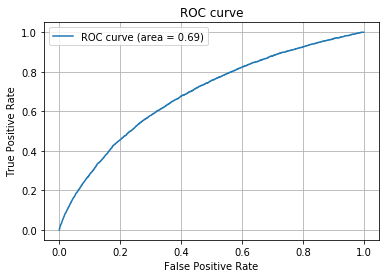

In [12]:
#ROC曲線とAUCによる評価
from sklearn import metrics

fpr , tpr , thresholds = metrics.roc_curve(y_test , y_test_pred)
auc = metrics.auc(fpr, tpr)


plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

In [13]:
print("AUC=", auc)

AUC= 0.6876494011052172


# 【問題3】テストデータに対する推定

テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。


正しく提出が行えていれば、精度は低くても構いません。

In [14]:
df_test = pd.read_csv('/Users/shinoda/diveintocode-ml/ML2001_sprint/application_test.csv')

In [15]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
rawdata = df_test.loc[: ,["SK_ID_CURR", "EXT_SOURCE_3", "DAYS_BIRTH"]]
Xa_test_origin = rawdata.dropna(how = "any")
Xa_test_origin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40076 entries, 0 to 48743
Data columns (total 3 columns):
SK_ID_CURR      40076 non-null int64
EXT_SOURCE_3    40076 non-null float64
DAYS_BIRTH      40076 non-null int64
dtypes: float64(1), int64(2)
memory usage: 1.2 MB


In [17]:
SK_ID_CURR_Dropped = Xa_test_origin["SK_ID_CURR"]

In [18]:
Xa_test = Xa_test_origin.drop("SK_ID_CURR" , axis = 1)

In [19]:
SK_ID_CURR_Dropped.head()

0    100001
1    100005
2    100013
3    100028
5    100042
Name: SK_ID_CURR, dtype: int64

In [20]:
#標準化処理

from sklearn.preprocessing import StandardScaler
sc_test = StandardScaler()
sc_test.fit(Xa_test)
Xa_test_std = sc_test.transform(Xa_test)

In [21]:
#【問題２】で学習したモデルをテストデータに適用
y_test_pred = lr.predict(Xa_test_std)
y_test_pred.shape

(40076,)

In [22]:
#提出データ作成のために一度DF化
SK_ID_CURR_Dropped = pd.DataFrame(data = SK_ID_CURR_Dropped)
y_test_pred = pd.DataFrame(data = y_test_pred)

subfile = SK_ID_CURR_Dropped.join( y_test_pred)

In [23]:
subfile.to_csv("subfile.csv" )

# 【問題4】特徴量エンジニアリング

精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。



In [26]:
rawdata_b = df.loc[: , ["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3",
                        "DAYS_BIRTH", "TARGET"]]
rawdata_b.head()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,TARGET
0,0.083037,0.262949,0.139376,-9461,1
1,0.311267,0.622246,NaN,-16765,0
2,NaN,0.555912,0.729567,-19046,0
3,NaN,0.650442,NaN,-19005,0
4,NaN,0.322738,NaN,-19932,0


In [27]:
#欠損値処理
Xb = rawdata_b.dropna(how = "any")
Xb.shape

(109589, 5)

In [28]:
#分割
y = Xb.loc[: , "TARGET"]
Xb = Xb.iloc[: , :4]

In [29]:
#前処理
X_train , X_test , y_train , y_test = train_test_split(
              Xb , y , test_size = 0.25 , random_state = 0)

In [30]:
#標準化
sc_b = StandardScaler()
sc_b.fit(X_train)
X_b_std = sc_b.transform(X_train)
X_test = sc_b.transform(X_test)

In [31]:
#学習

lr_b = LinearRegression()
lr_b.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#推定
y_test_pred = lr_b.predict(X_test)
y_train_pred = lr_b.predict(X_train)

AUC= 0.7396674850107428


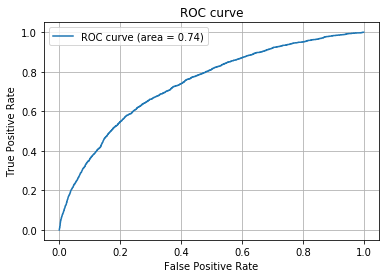

In [33]:
fpr , tpr , thresholds = metrics.roc_curve(y_test , y_test_pred)
auc = metrics.auc(fpr, tpr)


plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
print("AUC=", auc)

特徴量を加えたことでAUCが上がった